In [68]:
import selenium
from selenium import webdriver
from urllib.parse import quote
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
%matplotlib inline
import platform
from scipy.stats import *
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [41]:
data = pd.read_csv('./final/삼치_0420.csv')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90156 entries, 0 to 90155
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    90156 non-null  int64  
 1   Unnamed: 0.1  90156 non-null  int64  
 2   어종            90156 non-null  object 
 3   산지            90156 non-null  object 
 4   규격            90155 non-null  object 
 5   포장            90155 non-null  object 
 6   수량            90156 non-null  object 
 7   중량            90156 non-null  float64
 8   낙찰고가          90156 non-null  object 
 9   낙찰저가          90156 non-null  object 
 10  평균가           90156 non-null  object 
 11  일시            90156 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 8.3+ MB


In [43]:
data['수량'] = data['수량'].str.replace(',','')
data['수량'] = data['수량'].astype({'수량':float})
data['평균가'] = data['평균가'].str.replace(',','')
data['평균가'] = data['평균가'].astype(float)

In [45]:
data['1kg price'] = (data['평균가']/data['중량']).round(2)
data['qty'] = data['수량']*data['중량']

In [46]:
data.head()

,Unnamed: 0,Unnamed: 0.1,어종,산지,규격,포장,수량,중량,낙찰고가,낙찰저가,평균가,일시,qty,1kg price
0,0,0,(선)삼치,통영,중,kg,169.5,1.0,"6,000","4,000",4900.0,2006.03.21,169.5,4900.0
1,1,1,(선)삼치,부산(기장),중,kg,120.1,1.0,"3,000","2,800",3000.0,2006.03.21,120.1,3000.0
2,2,2,(선)삼치,통영,06미,S/P,1.0,8.0,"6,000","6,000",6000.0,2006.03.22,8.0,750.0
3,3,3,(선)삼치,통영,중,kg,18.6,1.0,"9,000","8,000",8500.0,2006.03.22,18.6,8500.0
4,4,4,(선)삼치,부산(기장),중,kg,49.4,1.0,"5,000","3,000",3900.0,2006.03.22,49.4,3900.0


In [47]:
data = data.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [52]:
data = data.drop(['규격','포장'], axis=1)

In [54]:
data = data.drop(['평균가'], axis=1)

In [55]:
data

,어종,산지,일시,qty,1kg price
0,(선)삼치,통영,2006.03.21,169.5,4900.00
1,(선)삼치,부산(기장),2006.03.21,120.1,3000.00
2,(선)삼치,통영,2006.03.22,8.0,750.00
3,(선)삼치,통영,2006.03.22,18.6,8500.00
4,(선)삼치,부산(기장),2006.03.22,49.4,3900.00
...,...,...,...,...,...
90151,(선)삼치,추자도,2021.04.07,20.0,9000.00
90152,(선)삼치,포항,2021.04.07,320.0,9800.00
90153,(선)삼치,감포,2021.04.08,1232.7,8400.00
90154,(선)삼치,포항,2021.04.08,378.9,9800.00


In [58]:
data.groupby('산지').sum().sort_values('qty', ascending=False).head(20)

,qty,1kg price
산지,,
부산(기장),14663742.30,30239732.52
여수,6376121.80,30005449.44
삼천포,5521639.08,30645814.62
통영,4327506.44,16103323.26
마산,2320936.00,2981256.60
포항,1617436.44,16539630.15
강구,1439799.50,12894134.66
남해,1185461.40,4724481.69
죽변,801964.04,7607168.76


In [59]:
data['year'] = data['일시'].str.split('.').str.get(0)
data['month'] = data['일시'].str.split('.').str.get(1)
data['day'] = data['일시'].str.split('.').str.get(2)

In [60]:
data

,어종,산지,일시,qty,1kg price,year,month,day
0,(선)삼치,통영,2006.03.21,169.5,4900.00,2006,03,21
1,(선)삼치,부산(기장),2006.03.21,120.1,3000.00,2006,03,21
2,(선)삼치,통영,2006.03.22,8.0,750.00,2006,03,22
3,(선)삼치,통영,2006.03.22,18.6,8500.00,2006,03,22
4,(선)삼치,부산(기장),2006.03.22,49.4,3900.00,2006,03,22
...,...,...,...,...,...,...,...,...
90151,(선)삼치,추자도,2021.04.07,20.0,9000.00,2021,04,07
90152,(선)삼치,포항,2021.04.07,320.0,9800.00,2021,04,07
90153,(선)삼치,감포,2021.04.08,1232.7,8400.00,2021,04,08
90154,(선)삼치,포항,2021.04.08,378.9,9800.00,2021,04,08


In [62]:
data.columns = ['species','from','date','qty','1kg price','year','month','day']

In [63]:
data

,species,from,date,qty,1kg price,year,month,day
0,(선)삼치,통영,2006.03.21,169.5,4900.00,2006,03,21
1,(선)삼치,부산(기장),2006.03.21,120.1,3000.00,2006,03,21
2,(선)삼치,통영,2006.03.22,8.0,750.00,2006,03,22
3,(선)삼치,통영,2006.03.22,18.6,8500.00,2006,03,22
4,(선)삼치,부산(기장),2006.03.22,49.4,3900.00,2006,03,22
...,...,...,...,...,...,...,...,...
90151,(선)삼치,추자도,2021.04.07,20.0,9000.00,2021,04,07
90152,(선)삼치,포항,2021.04.07,320.0,9800.00,2021,04,07
90153,(선)삼치,감포,2021.04.08,1232.7,8400.00,2021,04,08
90154,(선)삼치,포항,2021.04.08,378.9,9800.00,2021,04,08


In [64]:
data.groupby('species').sum().sort_values('qty', ascending=False).head(20)

,qty,1kg price
species,,
(선)삼치,36944688.28,2.251146e+08
(냉)삼치,6923590.00,1.429320e+07
(선)줄삼치,310460.90,3.391693e+06
(선)꼬치삼치,5099.30,2.127277e+04
(활)꼬치삼치,370.10,5.800000e+03
(냉)줄삼치,245.00,3.476470e+03
(선)홍삼치,166.00,1.625000e+03
(선)동갈삼치,20.00,7.000000e+02
(활)홍삼치,20.00,2.600000e+04


In [66]:
grouped = data.groupby('species')
species = grouped.agg({'qty': 'sum', '1kg price' : 'mean'}).round(2)
species.sort_values('qty',ascending=False)

,qty,1kg price
species,,
(선)삼치,36944688.28,2732.80
(냉)삼치,6923590.00,2551.45
(선)줄삼치,310460.90,1585.64
(선)꼬치삼치,5099.30,709.09
(활)꼬치삼치,370.10,5800.00
(냉)줄삼치,245.00,1158.82
(선)홍삼치,166.00,541.67
(선)동갈삼치,20.00,700.00
(활)홍삼치,20.00,13000.00


<BarContainer object of 9 artists>

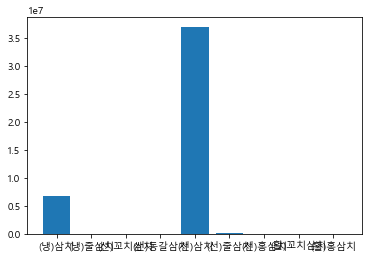

In [69]:
plt.bar(species.index,species['qty'])

In [75]:
a = species.sort_values('qty',ascending=False).tail(6).index

In [79]:
data['species'].unique()

array(['(선)삼치', '(냉)삼치', '(선)꼬치삼치', '(선)줄삼치', '(활)홍삼치', '(선)홍삼치',
       '(선)동갈삼치', '(활)꼬치삼치', '(냉)줄삼치'], dtype=object)

In [96]:
a = data[(data['species']=='(냉)줄삼치')|(data['species']=='(선)동갈삼치')|(data['species']=='(선)홍참치')|(data['species']=='(냉)줄삼치')|(data['species']=='(활)홍삼치')|(data['species']=='(선)홍삼치')|(data['species']=='(활)꼬치삼치')|(data['species']=='(선)꼬치삼치')].index

In [97]:
a.values

array([  332,  1705,  8983,  9040,  9874,  9903, 10118, 13893, 14424,
       14425, 14871, 23769, 37024, 38774, 39431, 40378, 40485, 41739,
       53256, 58998, 59065, 59085, 59101, 59107, 59284, 59419, 59666,
       59706, 59727, 59930, 59931, 59946, 60463, 60596, 60870, 61267,
       61847, 61880, 61881, 63083], dtype=int64)

In [98]:
data_f = data.drop(a,axis=0)
data_f.shape

(90116, 8)

In [99]:
grouped1 = data_f.groupby('species')
species1 = grouped1.agg({'qty': 'sum', '1kg price' : 'mean'}).round(2)
species1.sort_values('qty',ascending=False)

,qty,1kg price
species,,
(선)삼치,36944688.28,2732.80
(냉)삼치,6923590.00,2551.45
(선)줄삼치,310460.90,1585.64


<BarContainer object of 3 artists>

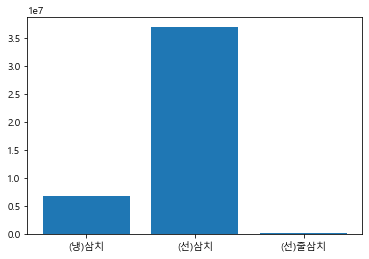

In [100]:
plt.bar(species1.index,species1['qty'])

In [102]:
data_f = data_f.drop(data_f[data_f['species']=='(선)줄삼치'].index,axis=0)

In [103]:
grouped1 = data_f.groupby('species')
species1 = grouped1.agg({'qty': 'sum', '1kg price' : 'mean'}).round(2)
species1.sort_values('qty',ascending=False)

,qty,1kg price
species,,
(선)삼치,36944688.28,2732.80
(냉)삼치,6923590.00,2551.45


In [ ]:
# 지역 이상치 삭제

In [124]:
grouped_from = data_f.groupby('from')
species_from = grouped_from.agg({'qty': 'sum', '1kg price' : 'mean'}).round(2)
species_from.sort_values('qty',ascending=False).head(20)

,qty,1kg price
from,,
부산(기장),14462378.20,2434.99
여수,6353602.10,2240.28
삼천포,5503433.48,2661.87
통영,4317641.44,2160.61
마산,2320936.00,2596.91
포항,1616179.74,3147.55
강구,1438411.40,2971.37
남해,1178789.40,1241.71
죽변,799840.44,2700.13


In [ ]:
a = species_from[species_from['qty']<1000000].index
test1 = pd.DataFrame()
for i in a.values :
    test = data_f[data_f['from'] == i]
    test1 = test1.append(test)
test_f = data_f.drop(test1.index, axis=0)

In [129]:
a = species_from[species_from['qty']<1000000].index
test1 = pd.DataFrame()
for i in a.values :
    test = data_f[data_f['from'] == i]
    test1 = test1.append(test)
data_ff = data_f.drop(test1.index, axis=0)

In [130]:
data_f.shape,data_ff.shape

((87977, 8), (58601, 8))

In [135]:
grouped_from1 = data_ff.groupby('from')
species_from1 = grouped_from1.agg({'qty': 'sum', '1kg price' : 'mean'}).round(2)
species_from1.sort_values('qty',ascending=False).head(20)

,qty,1kg price
from,,
부산(기장),14462378.20,2434.99
여수,6353602.10,2240.28
삼천포,5503433.48,2661.87
통영,4317641.44,2160.61
마산,2320936.00,2596.91
포항,1616179.74,3147.55
강구,1438411.40,2971.37
남해,1178789.40,1241.71


In [157]:
test_month = data_ff.copy()

In [158]:
test_month['date2'] = test_month['year'].str.cat(test_month['month'],sep='.')

In [163]:
test_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55250 entries, 0 to 90155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    55250 non-null  object 
 1   from       55250 non-null  object 
 2   date       55250 non-null  object 
 3   qty        55250 non-null  float64
 4   1kg price  55250 non-null  float64
 5   year       55250 non-null  object 
 6   month      55250 non-null  object 
 7   day        55250 non-null  object 
 8   date2      55250 non-null  object 
dtypes: float64(2), object(7)
memory usage: 6.7+ MB


In [167]:
gr = test_month.groupby(['date2','from'])
test_graph = gr.agg({'qty': 'sum', '1kg price' : 'mean'}).round(2)
test_graph

qty  1kg price
date2   from                      
2006.03 마산        660.0    1833.33
        부산(기장)  83610.7    1780.43
        삼천포        10.0    2400.00
        통영       2157.0    3117.86
2006.04 마산      13010.0    1812.67
...                 ...        ...
2021.03 포항        430.0    3766.88
2021.04 마산        150.0    4566.67
        부산(기장)   1650.0    3740.00
        여수       1085.0    2958.00
        포항         52.0    5166.66

[1245 rows x 2 columns]

In [183]:
test_graph = test_graph.reset_index()

In [172]:
import seaborn as sns

In [184]:
test_graph['date2'].unique()

0       2006.03
1       2006.03
2       2006.03
3       2006.03
4       2006.04
         ...   
1240    2021.03
1241    2021.04
1242    2021.04
1243    2021.04
1244    2021.04
Name: date2, Length: 1245, dtype: object

In [203]:
test_graph

,date2,from,qty,1kg price
0,2006.03,마산,660.0,1833.33
1,2006.03,부산(기장),83610.7,1780.43
2,2006.03,삼천포,10.0,2400.00
3,2006.03,통영,2157.0,3117.86
4,2006.04,마산,13010.0,1812.67
...,...,...,...,...
1240,2021.03,포항,430.0,3766.88
1241,2021.04,마산,150.0,4566.67
1242,2021.04,부산(기장),1650.0,3740.00
1243,2021.04,여수,1085.0,2958.00


In [206]:
y = np.arange(2006,2022,1)
num2 = np.arange(0,16,1)

In [207]:
test_month

,species,from,date,qty,1kg price,year,month,day,date2
0,(선)삼치,통영,2006.03.21,169.5,4900.00,2006,03,21,2006.03
1,(선)삼치,부산(기장),2006.03.21,120.1,3000.00,2006,03,21,2006.03
2,(선)삼치,통영,2006.03.22,8.0,750.00,2006,03,22,2006.03
4,(선)삼치,부산(기장),2006.03.22,49.4,3900.00,2006,03,22,2006.03
5,(선)삼치,부산(기장),2006.03.22,480.0,1625.00,2006,03,22,2006.03
...,...,...,...,...,...,...,...,...,...
90138,(선)삼치,여수,2021.04.05,400.0,3690.00,2021,04,05,2021.04
90144,(선)삼치,여수,2021.04.07,20.0,2000.00,2021,04,07,2021.04
90147,(선)삼치,포항,2021.04.07,22.0,5000.00,2021,04,07,2021.04
90148,(선)삼치,포항,2021.04.07,30.0,5333.33,2021,04,07,2021.04


In [220]:
test_month[test_month['year']== '2006'].groupby('date2').sum()

,qty,1kg price
date2,,
2006.03,86437.70,107958.33
2006.04,299136.30,532656.52
2006.05,243597.60,714672.79
2006.06,211275.90,581871.81
2006.07,180009.90,998217.15
2006.08,195840.10,905222.42
2006.09,292735.93,772618.32
2006.10,324658.10,699646.97
2006.11,428423.90,676719.01


In [222]:
fil = test_month[test_month['year']== '2006']
grouped = fil.groupby(['date2','from'])
date = grouped.agg({'qty': 'sum', '1kg price' : 'mean'})
date

qty    1kg price
date2   from                         
2006.03 마산         660.0  1833.330000
        부산(기장)   83610.7  1780.434783
        삼천포         10.0  2400.000000
        통영        2157.0  3117.857143
2006.04 마산       13010.0  1812.665600
...                  ...          ...
2006.12 마산       14010.0  1021.428571
        부산(기장)  148136.6  1652.558140
        삼천포     129311.5  1192.190571
        여수       34219.8   992.982059
        통영       97824.5  1528.395556

[70 rows x 2 columns]

In [223]:
where =[]
for i in y :
    i = str(i)
    fil = test_month[test_month['year']== i]
    grouped = fil.groupby(['from','date2'])
    date = grouped.agg({'qty': 'sum', '1kg price' : 'mean'})
    date = date.reset_index()
    where.append(date)

In [234]:
where[1]['date2'].values

array(['2007.04', '2007.05', '2007.06', '2007.07', '2007.08', '2007.09',
       '2007.10', '2007.11', '2007.12', '2007.03', '2007.05', '2007.06',
       '2007.07', '2007.08', '2007.09', '2007.10', '2007.11', '2007.12',
       '2007.01', '2007.02', '2007.03', '2007.04', '2007.05', '2007.06',
       '2007.07', '2007.08', '2007.09', '2007.12', '2007.01', '2007.02',
       '2007.03', '2007.04', '2007.05', '2007.06', '2007.07', '2007.08',
       '2007.09', '2007.10', '2007.11', '2007.12', '2007.01', '2007.02',
       '2007.03', '2007.04', '2007.05', '2007.06', '2007.07', '2007.08',
       '2007.09', '2007.10', '2007.11', '2007.12', '2007.01', '2007.02',
       '2007.03', '2007.04', '2007.05', '2007.06', '2007.07', '2007.08',
       '2007.09', '2007.10', '2007.11', '2007.12', '2007.01', '2007.02',
       '2007.03', '2007.04', '2007.05', '2007.06', '2007.07', '2007.08',
       '2007.09', '2007.10', '2007.11', '2007.12', '2007.01', '2007.04',
       '2007.05', '2007.06', '2007.07', '2007.08', 

In [265]:
where[1]['date2'].unique()

array(['2007.04', '2007.05', '2007.06', '2007.07', '2007.08', '2007.09',
       '2007.10', '2007.11', '2007.12', '2007.03', '2007.01', '2007.02'],
      dtype=object)

AttributeError: 'numpy.ndarray' object has no attribute 'lineplot'

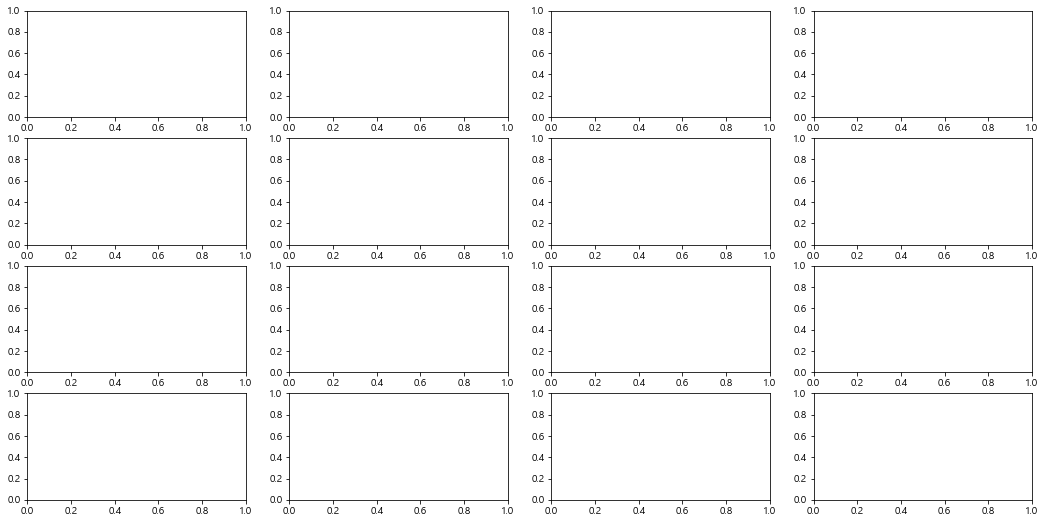

In [267]:
fig, axes = plt.subplots(figsize=(18,9),nrows=4, ncols=4)
for j in num2 :
    row = j//4
    col = j%4
    sns.lineplot(x=where[j]['date2'].unique(),y=where[j]['1kg price'], hue=where[j]['from'].unique(),ax = axes[row][col])
    plt.title(y[j])
    plt.subplots_adjust(hspace=0.5,wspace=0.35)

In [272]:
where[1]['date2'].unique

<bound method Series.unique of 0     2007.04
1     2007.05
2     2007.06
3     2007.07
4     2007.08
       ...   
81    2007.08
82    2007.09
83    2007.10
84    2007.11
85    2007.12
Name: date2, Length: 86, dtype: object>

In [278]:
where[1]['1kg price']

,from,date2,qty,1kg price
0,강구,2007.04,336.0,666.670000
1,강구,2007.05,60.0,3550.000000
2,강구,2007.06,674.0,2634.000000
3,강구,2007.07,983.0,1589.393636
4,강구,2007.08,11711.8,1684.910000
...,...,...,...,...
81,포항,2007.08,13826.0,1458.419655
82,포항,2007.09,20768.0,1267.987805
83,포항,2007.10,37974.0,1050.981129
84,포항,2007.11,19114.0,1385.187500


In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(x=where[1]['date2 '].unique,y=where[1]['1kg price'], hue=where[1]['from'])
plt.show()

In [277]:
plt.figure(figsize=(18,6))
sns.lineplot(x=where[1]['date2'].unique,y=where[1]['1kg price'], hue=where[1]['from'])
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'lineplot'

<Figure size 1296x432 with 0 Axes>

<BarContainer object of 8 artists>

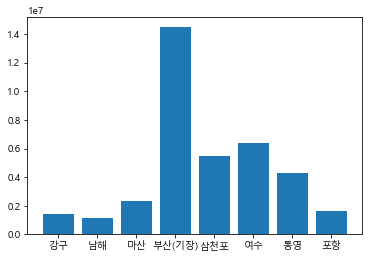

In [136]:
plt.bar(species_from1.index,species_from1['qty'])

In [137]:
t = [data_ff[data_ff['species']=='(선)삼치']['1kg price'],data_ff[data_ff['species']=='(냉)삼치']['1kg price']]

{'whiskers': [<matplotlib.lines.Line2D at 0x20c06a94f70>,
 'caps': [<matplotlib.lines.Line2D at 0x20c0ea7d040>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c0ca63190>,
 'medians': [<matplotlib.lines.Line2D at 0x20c0ea50130>,
 'fliers': [<matplotlib.lines.Line2D at 0x20c0ea50df0>,
 'means': []}

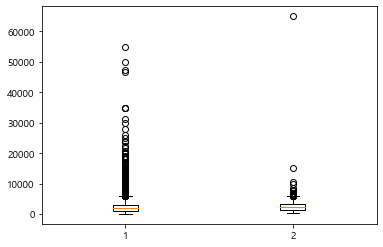

In [138]:
plt.boxplot(t)

{'whiskers': [<matplotlib.lines.Line2D at 0x20c0473f580>,
 'caps': [<matplotlib.lines.Line2D at 0x20c0351afa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c0473fa30>],
 'medians': [<matplotlib.lines.Line2D at 0x20c0e85db50>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c03869c70>],
 'means': []}

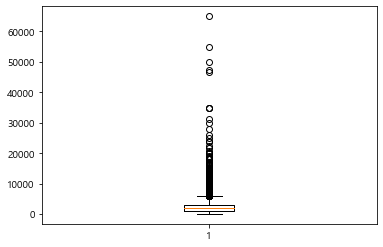

In [140]:
plt.boxplot(data_ff['1kg price'])

In [142]:
pd.qcut(data_ff['1kg price'], 4, ['q1','q2','q3','q4'])
Q1 = (data_ff['1kg price']).quantile(.25)
Q2 = (data_ff['1kg price']).quantile(.5)
Q3 = (data_ff['1kg price']).quantile(.75)
Q1,Q2,Q3
IQR = Q3-Q1
IQR
min = Q1-1.5*IQR
max = (Q3+1.5*IQR).round(2)
min, max
data_ff = data_ff[data_ff['1kg price']<=max]

{'whiskers': [<matplotlib.lines.Line2D at 0x20c0b72ce20>,
 'caps': [<matplotlib.lines.Line2D at 0x20c0ca833a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c0ea72f40>],
 'medians': [<matplotlib.lines.Line2D at 0x20c0cbe8b80>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c0eb21a90>],
 'means': []}

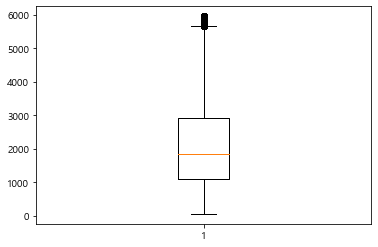

In [144]:
plt.boxplot(data_ff['1kg price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x20c067bb610>,
 'caps': [<matplotlib.lines.Line2D at 0x20c0ed56250>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c0ea43550>,
 'medians': [<matplotlib.lines.Line2D at 0x20c0ed56ee0>,
 'fliers': [<matplotlib.lines.Line2D at 0x20c0cbf67c0>,
 'means': []}

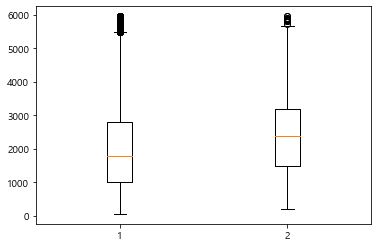

In [145]:
t = [data_ff[data_ff['species']=='(선)삼치']['1kg price'],data_ff[data_ff['species']=='(냉)삼치']['1kg price']]
plt.boxplot(t)

In [149]:
data_ff.to_csv('./final/(0420)삼치_outlier_delete.csv')